In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
!pip install tensorflow torch torchvision scikit-learn numpy opencv-python

# Download the CROHME dataset
!wget -O CROHME23.zip "https://zenodo.org/record/8428035/files/CROHME23.zip?download=1"

# Unzip the dataset
!unzip CROHME23.zip -d dataset
!ls dataset
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# Valid image extensions
valid_extensions = ('.png', '.jpg', '.jpeg')
# Set dataset path
dataset_path = 'dataset/TC11_CROHME23'  # Adjust based on the exact unzipped path

def load_data(dataset_path):
    images, labels = [], []

    # Go through each split (train, val, test)
    for split_dir in os.listdir(dataset_path):
        split_path = os.path.join(dataset_path, split_dir)

        if os.path.isdir(split_path):
            # Go through each label directory inside the split
            for label_dir in os.listdir(split_path):
                label_path = os.path.join(split_path, label_dir)

                if os.path.isdir(label_path):
                    # Process images in the label directory
                    print(f"Processing label directory: {label_path}")

                    for image_file in os.listdir(label_path):
                        if not image_file.lower().endswith(valid_extensions):
                            print(f"Skipping non-image file: {image_file}")
                            continue

                        image_path = os.path.join(label_path, image_file)
                        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

                        if image is not None:  # Check if image was loaded successfully
                            image = cv2.resize(image, (64, 64))  # Resize all images to 64x64
                            images.append(image)
                            labels.append(label_dir)  # Label is the folder name
                        else:
                            print(f"Warning: Could not load image {image_path}")

    # Convert lists to arrays
    images = np.array(images, dtype="float32") / 255.0  # Normalize pixel values
    labels = np.array(labels)

    return images, labels

# Load the dataset
images, labels = load_data(dataset_path)
print(f"Loaded {len(images)} images with {len(set(labels))} unique labels.")


Streaming output truncated to the last 5000 lines.
  inflating: dataset/TC11_CROHME23/SymLG/train/OffHME/01018.lg  
  inflating: dataset/TC11_CROHME23/SymLG/train/OffHME/09824.lg  
  inflating: dataset/TC11_CROHME23/SymLG/train/OffHME/09285.lg  
  inflating: dataset/TC11_CROHME23/SymLG/train/OffHME/05287.lg  
  inflating: dataset/TC11_CROHME23/SymLG/train/OffHME/09077.lg  
  inflating: dataset/TC11_CROHME23/SymLG/train/OffHME/01290.lg  
  inflating: dataset/TC11_CROHME23/SymLG/train/OffHME/05937.lg  
  inflating: dataset/TC11_CROHME23/SymLG/train/OffHME/00735.lg  
  inflating: dataset/TC11_CROHME23/SymLG/train/OffHME/05314.lg  
  inflating: dataset/TC11_CROHME23/SymLG/train/OffHME/08034.lg  
  inflating: dataset/TC11_CROHME23/SymLG/train/OffHME/04054.lg  
  inflating: dataset/TC11_CROHME23/SymLG/train/OffHME/00703.lg  
  inflating: dataset/TC11_CROHME23/SymLG/train/OffHME/07810.lg  
  inflating: dataset/TC11_CROHME23/SymLG/train/OffHME/07807.lg  
  inflating: dataset/TC11_CROHME23/SymL

In [ ]:
def parse_lg_file(file_path):
    # Example placeholder: read .lg file as text or structured data
    with open(file_path, 'r') as f:
        content = f.read()
    # Process content as needed. This example converts text to ASCII codes.
    return [ord(char) for char in content[:100]]  # Adjust as needed

def load_data(dataset_path):
    images, labels = [], []

    # Process files in each label directory
    for split_dir in os.listdir(dataset_path):
        split_path = os.path.join(dataset_path, split_dir)
        if os.path.isdir(split_path):
            for label_dir in os.listdir(split_path):
                label_path = os.path.join(split_path, label_dir)
                if os.path.isdir(label_path):
                    for file_name in os.listdir(label_path):
                        file_path = os.path.join(label_path, file_name)
                        if file_name.lower().endswith(valid_extensions):
                            # Process image file
                            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                            if image is not None:
                                image = cv2.resize(image, (64, 64))
                                images.append(image)
                                labels.append(label_dir)
                        elif file_name.lower().endswith('.lg'):
                            # Process .lg file
                            parsed_data = parse_lg_file(file_path)
                            images.append(parsed_data)  # Replace 'images' with a suitable list if needed
                            labels.append(label_dir)

    images = np.array(images, dtype="float32") / 255.0 if images else np.array([])
    labels = np.array(labels) if labels else np.array([])
    return images, labels


In [ ]:
import os

def print_directory_structure(path, level=0):
    indent = "    " * level
    for item in os.listdir(path):
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            print(f"{indent}Directory: {item}")
            print_directory_structure(item_path, level + 1)
        else:
            print(f"{indent}File: {item}")

# Print the full directory structure of the dataset
print("Full Directory Structure:")
print_directory_structure(dataset_path)

Streaming output truncated to the last 5000 lines.
            File: RIT_2014_83.lg
            File: 93_rosario.lg
            File: formulaire035-equation011.lg
            File: formulaire034-equation053.lg
            File: 200923-1556-72.lg
            File: formulaire009-equation053.lg
            File: 200923-1556-118.lg
            File: formulaire038-equation053.lg
            File: 200926-1550-0.lg
            File: 34_em_225.lg
            File: MfrDB3474.lg
            File: 123_em_375.lg
            File: MfrDB0114.lg
            File: formulaire003-equation071.lg
            File: 2009210-947-15.lg
            File: RIT_2014_237.lg
            File: MfrDB3218.lg
            File: 124_em_420.lg
            File: 200923-1254-231.lg
            File: MfrDB0786.lg
            File: 2009213-139-73.lg
            File: MfrDB3277.lg
            File: 103_em_7.lg
            File: 200922-949-44.lg
            File: TrainData2_23_sub_98.lg
            File: KME1G3_8_sub_16.lg
    

In [ ]:
def parse_lg_file(file_path):
    # Read .lg file as text
    with open(file_path, 'r') as file:
        content = file.read()

    # Example processing: Convert first 100 characters to ASCII values
    processed_content = np.array([ord(char) for char in content[:100]])  # Adjust processing as needed
    return processed_content


In [ ]:
# Load the dataset
data, labels = load_data(dataset_path)
print(f"Loaded {len(data)} samples with {len(labels)} labels.")
print("Sample data:", data[:3])       # Print the first few samples for inspection
print("Sample labels:", labels[:3])   # Print the first few labels


Loaded 0 samples with 0 labels.
Sample data: []
Sample labels: []


In [ ]:
def load_data(dataset_path):
    images, labels = [], []

    # Traverse dataset structure
    for split_dir in os.listdir(dataset_path):
        split_path = os.path.join(dataset_path, split_dir)

        if os.path.isdir(split_path):
            # Process each label directory inside the split
            for label_dir in os.listdir(split_path):
                label_path = os.path.join(split_path, label_dir)

                if os.path.isdir(label_path):
                    print(f"Processing label directory: {label_path}")

                    # Process each file in the label directory
                    for file_name in os.listdir(label_path):
                        file_path = os.path.join(label_path, file_name)

                        # Print file details for debugging
                        print(f"Found file: {file_path} - Size: {os.path.getsize(file_path)} bytes")

                        # Check if the file is an image or .lg file
                        if file_name.lower().endswith(valid_extensions) or '.' not in file_name:
                            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                            if image is not None:
                                image = cv2.resize(image, (64, 64))
                                images.append(image)
                                labels.append(label_dir)
                            else:
                                print(f"Warning: Could not load image {file_path}")
                        elif file_name.lower().endswith('.lg'):
                            parsed_data = parse_lg_file(file_path)
                            images.append(parsed_data)
                            labels.append(label_dir)

    images = np.array(images, dtype="float32") / 255.0 if images else np.array([])
    labels = np.array(labels) if labels else np.array([])
    return images, labels

# Run the function with detailed debug output
images, labels = load_data(dataset_path)
print(f"Loaded {len(images)} samples with {len(set(labels))} unique labels.")


Processing label directory: dataset/TC11_CROHME23/IMG/test
Found file: dataset/TC11_CROHME23/IMG/test/CROHME2023_test - Size: 106496 bytes
Found file: dataset/TC11_CROHME23/IMG/test/CROHME2019_test - Size: 57344 bytes
Processing label directory: dataset/TC11_CROHME23/IMG/val
Found file: dataset/TC11_CROHME23/IMG/val/CROHME2016_test - Size: 49152 bytes
Found file: dataset/TC11_CROHME23/IMG/val/CROHME2023_val - Size: 32768 bytes
Processing label directory: dataset/TC11_CROHME23/IMG/train
Found file: dataset/TC11_CROHME23/IMG/train/CROHME2019 - Size: 503808 bytes
Found file: dataset/TC11_CROHME23/IMG/train/OffHME - Size: 266240 bytes
Found file: dataset/TC11_CROHME23/IMG/train/CROHME2013_train - Size: 40960 bytes
Processing label directory: dataset/TC11_CROHME23/INKML/test
Found file: dataset/TC11_CROHME23/INKML/test/CROHME2023_test - Size: 114688 bytes
Found file: dataset/TC11_CROHME23/INKML/test/CROHME2019_test - Size: 69632 bytes
Processing label directory: dataset/TC11_CROHME23/INKML/

In [ ]:
def load_data(dataset_path):
    images, labels = [], []

    # Recursive function to search for files
    def find_files_in_directory(path, label):
        for item in os.listdir(path):
            item_path = os.path.join(path, item)
            if os.path.isdir(item_path):
                # Recursively search inside subdirectories
                find_files_in_directory(item_path, label)
            elif item_path.lower().endswith(valid_extensions) or '.' not in item_path:
                # Process only image files or files without extensions
                image = cv2.imread(item_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    image = cv2.resize(image, (64, 64))
                    images.append(image)
                    labels.append(label)
                    print(f"Added image with shape: {image.shape}")  # Debugging line to confirm shape
                else:
                    print(f"Warning: Could not load image {item_path}")

    # Traverse dataset structure
    for split_dir in os.listdir(dataset_path):
        split_path = os.path.join(dataset_path, split_dir)
        if os.path.isdir(split_path):
            for label_dir in os.listdir(split_path):
                label_path = os.path.join(split_path, label_dir)
                if os.path.isdir(label_path):
                    print(f"Processing label directory: {label_path}")
                    # Call recursive file search within each label directory
                    find_files_in_directory(label_path, label_dir)

    # Convert lists to arrays
    images = np.array(images, dtype="float32") / 255.0 if images else np.array([])
    labels = np.array(labels) if labels else np.array([])
    return images, labels

# Load and inspect data
images, labels = load_data(dataset_path)
print(f"Loaded {len(images)} samples with {len(set(labels))} unique labels.")


Streaming output truncated to the last 5000 lines.
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (64, 64)
Added image with shape: (

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)  # Convert to categorical format


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Reshape X_train and X_test to add a channel dimension for CNN input
X_train = X_train.reshape(-1, 64, 64, 1)  # (samples, height, width, channels)
X_test = X_test.reshape(-1, 64, 64, 1)


In [ ]:
from tensorflow.keras import layers, models, Input

def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        Input(shape=input_shape),  # Explicitly add an Input layer
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Instantiate and compile the model
model = create_cnn_model((64, 64, 1), len(label_binarizer.classes_))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Check the structure of labels before transformation
print("Labels type:", type(labels))
print("Labels shape:", labels.shape)
print("Sample labels data:", labels[:5])  # Display first 5 items to inspect structure


Labels type: <class 'numpy.ndarray'>
Labels shape: (27279, 3, 2)
Sample labels data: [[[0. 1.]
  [1. 0.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]
  [1. 0.]]]


In [ ]:
import numpy as np

# Flatten labels if it has extra dimensions
labels = np.squeeze(labels)  # This will remove any dimensions of size 1

print("Labels shape after squeezing:", labels.shape)


Labels shape after squeezing: (27279, 3, 2)


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# One-hot encode only if necessary
if labels.ndim == 1 or (labels.ndim == 2 and labels.shape[1] == 1):  # Not yet one-hot encoded
    label_binarizer = LabelBinarizer()
    labels = label_binarizer.fit_transform(labels)
    labels = to_categorical(labels)  # Convert to categorical format if not already

# Verify the final shape
print(f"Final labels shape for training: {labels.shape}")


Final labels shape for training: (27279, 3, 2)


In [ ]:
# Flatten the labels array to ensure it's two-dimensional
labels = labels.reshape(labels.shape[0], -1)  # Reshape to (27279, 3)

# Verify the final shape
print(f"Final labels shape for training: {labels.shape}")


Final labels shape for training: (27279, 6)


In [ ]:
# Squeeze the labels to remove any unnecessary dimensions
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

# Verify the shape after squeezing
print("y_train shape after squeezing:", y_train.shape)
print("y_test shape after squeezing:", y_test.shape)


y_train shape after squeezing: (21823, 3, 2)
y_test shape after squeezing: (5456, 3, 2)


In [ ]:
# Flatten the labels to remove the extra dimension
y_train = y_train.reshape(-1, y_train.shape[-1])
y_test = y_test.reshape(-1, y_test.shape[-1])

# Verify the shapes after reshaping
print("y_train shape after reshaping:", y_train.shape)
print("y_test shape after reshaping:", y_test.shape)


y_train shape after reshaping: (65469, 2)
y_test shape after reshaping: (16368, 2)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (21823, 64, 64)
y_train shape: (21823, 6)


In [ ]:
import numpy as np

# Verify unique classes in y_train and y_test
unique_classes_train = np.unique(np.argmax(y_train, axis=1))
unique_classes_test = np.unique(np.argmax(y_test, axis=1))
print("Unique classes in y_train:", unique_classes_train)
print("Unique classes in y_test:", unique_classes_test)
print("Expected number of classes:", len(unique_classes_train))


Unique classes in y_train: [0 1]
Unique classes in y_test: [0 1]
Expected number of classes: 2


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
label_binarizer.fit([0, 1, 2])  # Ensure only 3 classes

# One-hot encode y_train and y_test to match 3 classes
y_train = to_categorical(label_binarizer.transform(np.argmax(y_train, axis=1)))
y_test = to_categorical(label_binarizer.transform(np.argmax(y_test, axis=1)))

print("y_train shape after encoding:", y_train.shape)
print("y_test shape after encoding:", y_test.shape)

y_train shape after encoding: (21823, 3, 2)
y_test shape after encoding: (5456, 3, 2)


In [ ]:
# Ensure y_train and y_test are two-dimensional
if y_train.ndim > 2:
    y_train = y_train.reshape(y_train.shape[0], -1)
if y_test.ndim > 2:
    y_test = y_test.reshape(y_test.shape[0], -1)

# Print to confirm
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


y_train shape: (21823, 6)
y_test shape: (5456, 6)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Input

num_classes = labels.shape[1]  # Adjust based on the actual number of unique classes in the dataset
print(f"Number of classes: {num_classes}")

# Define the model with an Input layer
model = Sequential([
    Input(shape=(64, 64, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Dynamically set to match the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy}")
print(f"Test loss: {test_loss}")
print("Model defined and compiled successfully.")


Number of classes: 6
Epoch 1/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.3393 - loss: 123224576.0000 - val_accuracy: 0.0000e+00 - val_loss: 5317056512.0000
Epoch 2/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.2450 - loss: 9798542336.0000 - val_accuracy: 0.0000e+00 - val_loss: 34683887616.0000
Epoch 3/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 28s 41ms/step - accuracy: 0.2554 - loss: 60359254016.0000 - val_accuracy: 0.0000e+00 - val_loss: 75535187968.0000
Epoch 4/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.2607 - loss: 180385693696.0000 - val_accuracy: 0.0000e+00 - val_loss: 423800340480.0000
Epoch 5/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.2488 - loss: 526737408000.0000 - val_accuracy: 0.0000e+00 - val_loss: 770311192576.0000
Epoch 6/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.2559 - loss: 789658992640.0000 - val_accuracy: 0.0000e+00 - val_loss: 741252726784.0000
Epoch 7/10
682/682 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step

In [ ]:
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(64, 64, 1)),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Dropout layer

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Dropout layer

    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),  # Dropout layer

    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),  # Dropout layer
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

# Initialize the data generator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Fit the data generator to the training data
datagen.fit(X_train)  # Fit must happen before model.fit()

# Define the model
model = Sequential([
    Input(shape=(64, 64, 1)),  # Input layer
    Conv2D(32, (3, 3), activation='relu'),  # First Conv2D layer
    MaxPooling2D((2, 2)),  # First MaxPooling2D layer
    Conv2D(64, (3, 3), activation='relu'),  # Second Conv2D layer
    MaxPooling2D((2, 2)),  # Second MaxPooling2D layer
    Flatten(),  # Flatten for dense layers
    Dense(128, activation='relu'),  # Fully connected layer
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define the learning rate scheduler
def scheduler(epoch, lr):
    return lr * 0.1 if epoch > 10 else lr

callback = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),  # Training with data augmentation
    epochs=20,
    validation_data=(X_test, y_test),
    callbacks=[callback]
)


Epoch 1/20
682/682 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.2726 - loss: 800888.8750 - val_accuracy: 0.0000e+00 - val_loss: 4449579.5000 - learning_rate: 0.0010
Epoch 2/20
682/682 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.2555 - loss: 21780642.0000 - val_accuracy: 0.0000e+00 - val_loss: 127058848.0000 - learning_rate: 0.0010
Epoch 3/20
682/682 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.2603 - loss: 137133552.0000 - val_accuracy: 0.0000e+00 - val_loss: 139989680.0000 - learning_rate: 0.0010
Epoch 4/20
682/682 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.2517 - loss: 292827648.0000 - val_accuracy: 0.0000e+00 - val_loss: 447678912.0000 - learning_rate: 0.0010
Epoch 5/20
682/682 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.2512 - loss: 516804000.0000 - val_accuracy: 0.0000e+00 - val_loss: 768683200.0000 - learning_rate: 0.0010
Epoch 6/20
682/682 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.2645 - loss: 916341504.0000 - val_accuracy: 0.0000e+00 - val_loss: 1

In [ ]:
model = Sequential([
    Input(shape=(64, 64, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),  # Additional convolutional layer
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),  # Increase the size of the dense layer
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Input(shape=(64, 64, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define EarlyStopping to stop training if no improvement in validation loss
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Define ModelCheckpoint to save the best model during training
model_checkpoint = ModelCheckpoint(
    'best_model.keras',  # Use .keras format as required by Keras
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/50
681/682 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2835 - loss: 1053077.6250
Epoch 1: val_loss improved from inf to 23926874.00000, saving model to best_model.keras
682/682 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.2834 - loss: 1062941.7500 - val_accuracy: 0.8697 - val_loss: 23926874.0000
Epoch 2/50
681/682 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2691 - loss: 34038756.0000
Epoch 2: val_loss did not improve from 23926874.00000
682/682 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.2690 - loss: 34087400.0000 - val_accuracy: 0.0000e+00 - val_loss: 51883868.0000
Epoch 3/50
681/682 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2567 - loss: 147822400.0000
Epoch 3: val_loss did not improve from 23926874.00000
682/682 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.2567 - loss: 147984592.0000 - val_accuracy: 0.8697 - val_loss: 391910272.0000
Epoch 4/50
681/682 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2639 - loss: 353303296.0000
Epoch 4: val_loss did n

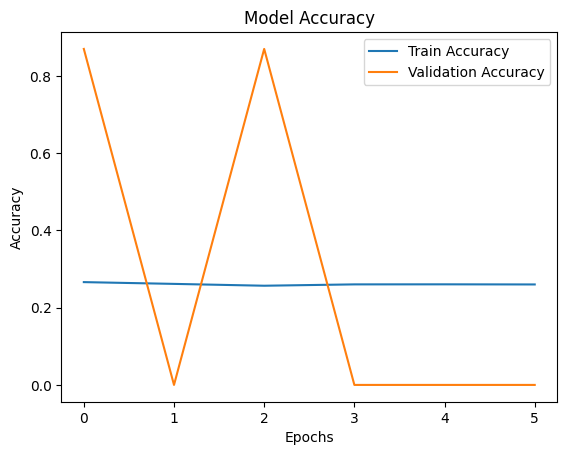

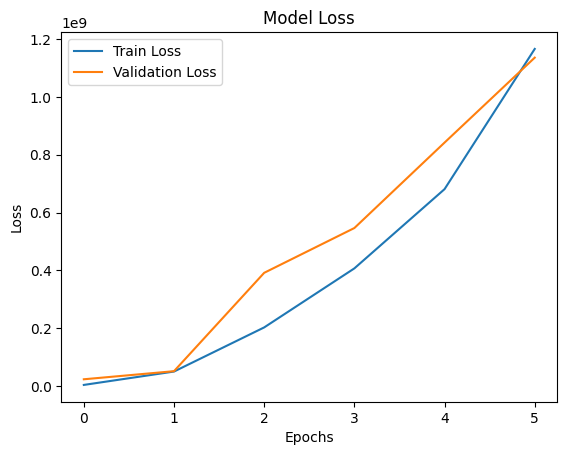

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


X_train shape: (21823, 64, 64, 1)
X_test shape: (5456, 64, 64, 1)
y_train shape: (21823, 2)
y_test shape: (5456, 2)
Epoch 1/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7173 - loss: 0.7079
Epoch 1: val_loss improved from inf to 197.22125, saving model to best_model.keras
682/682 ━━━━━━━━━━━━━━━━━━━━ 57s 80ms/step - accuracy: 0.7175 - loss: 0.7076 - val_accuracy: 0.8332 - val_loss: 197.2213 - learning_rate: 0.0010
Epoch 2/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8361 - loss: 0.4544
Epoch 2: val_loss improved from 197.22125 to 76.39030, saving model to best_model.keras
682/682 ━━━━━━━━━━━━━━━━━━━━ 52s 77ms/step - accuracy: 0.8361 - loss: 0.4544 - val_accuracy: 0.8332 - val_loss: 76.3903 - learning_rate: 0.0010
Epoch 3/50
682/682 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8368 - loss: 0.4523
Epoch 3: val_loss improved from 76.39030 to 59.37114, saving model to best_model.keras
682/682 ━━━━━━━━━━━━━━━━━━━━ 56s 81ms/step - accuracy: 0.8368 - loss: 0.4523

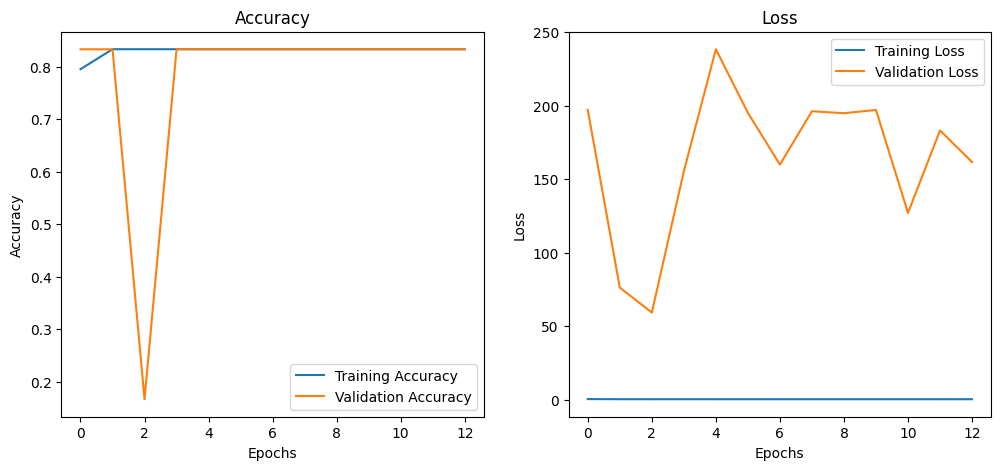

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

# Normalize the data
X_train = X_train / 255.0  # Scale pixel values to [0, 1]
X_test = X_test / 255.0

# Ensure input data shape is correct
if X_train.ndim == 3:  # Add channel dimension for grayscale images
    X_train = np.expand_dims(X_train, axis=-1)
if X_test.ndim == 3:
    X_test = np.expand_dims(X_test, axis=-1)

print("X_train shape:", X_train.shape)  # Expect (num_samples, 64, 64, 1)
print("X_test shape:", X_test.shape)    # Expect (num_samples, 64, 64, 1)

# Flatten labels to remove extra dimensions if necessary
if y_train.ndim > 2:
    y_train = y_train.reshape(y_train.shape[0], -1)  # Reshape to (num_samples, num_classes)
if y_test.ndim > 2:
    y_test = y_test.reshape(y_test.shape[0], -1)    # Reshape to (num_samples, num_classes)

# Reapply one-hot encoding
num_classes = len(np.unique(np.argmax(y_train, axis=-1)))  # Dynamically determine the number of classes
y_train = to_categorical(np.argmax(y_train, axis=-1), num_classes=num_classes)
y_test = to_categorical(np.argmax(y_test, axis=-1), num_classes=num_classes)

# Verify final label shapes
print("y_train shape:", y_train.shape)  # Expect (num_samples, num_classes)
print("y_test shape:", y_test.shape)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)  # Fit generator to training data

# Define the model
model = Sequential([
    Input(shape=(64, 64, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Regularization

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Regularization

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),  # Regularization

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),  # Regularization
    Dense(num_classes, activation='softmax')  # Output layer with num_classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=50,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.2f}, Test loss: {test_loss:.2f}")

# Plot learning curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


X_train shape: (21823, 64, 64, 1)
X_test shape: (5456, 64, 64, 1)
y_train shape: (21823, 2)
y_test shape: (5456, 2)
Epoch 1/100
682/682 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8296 - loss: 0.7830
Epoch 1: val_loss improved from inf to 0.50656, saving model to best_model.keras
682/682 ━━━━━━━━━━━━━━━━━━━━ 45s 63ms/step - accuracy: 0.8296 - loss: 0.7828 - val_accuracy: 0.8332 - val_loss: 0.5066 - learning_rate: 5.0000e-05
Epoch 2/100
682/682 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.8259 - loss: 0.4927
Epoch 2: val_loss improved from 0.50656 to 0.45458, saving model to best_model.keras
682/682 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - accuracy: 0.8259 - loss: 0.4927 - val_accuracy: 0.8332 - val_loss: 0.4546 - learning_rate: 5.0000e-05
Epoch 3/100
682/682 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.8355 - loss: 0.4512
Epoch 3: val_loss improved from 0.45458 to 0.45131, saving model to best_model.keras
682/682 ━━━━━━━━━━━━━━━━━━━━ 45s 66ms/step - accuracy: 0.8355 - loss: 0.451

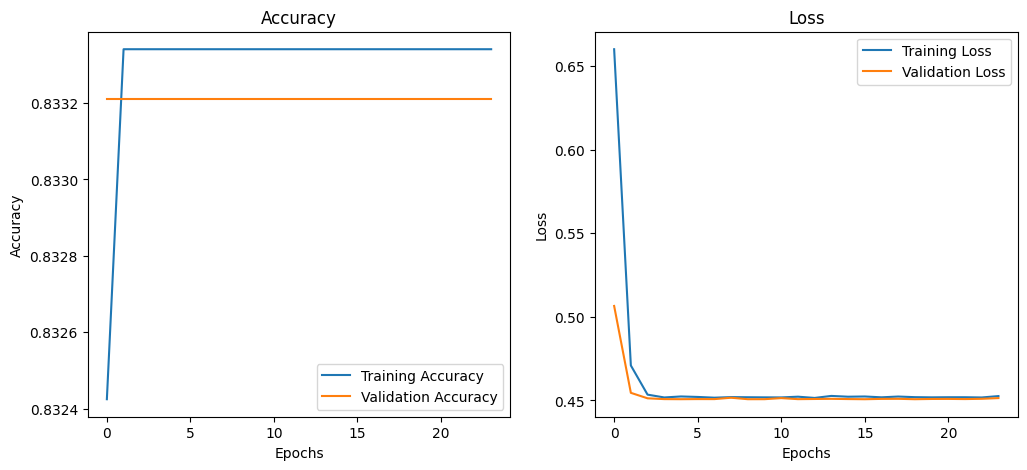

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Normalize the data
X_train = X_train / 255.0  # Scale pixel values to [0, 1]
X_test = X_test / 255.0

# Ensure input data shape is correct
if X_train.ndim == 3:  # Add channel dimension for grayscale images
    X_train = np.expand_dims(X_train, axis=-1)
if X_test.ndim == 3:
    X_test = np.expand_dims(X_test, axis=-1)

print("X_train shape:", X_train.shape)  # Expect (num_samples, 64, 64, 1)
print("X_test shape:", X_test.shape)    # Expect (num_samples, 64, 64, 1)

# Reapply one-hot encoding
num_classes = len(np.unique(np.argmax(y_train, axis=-1)))  # Dynamically determine the number of classes
y_train = to_categorical(np.argmax(y_train, axis=-1), num_classes=num_classes)
y_test = to_categorical(np.argmax(y_test, axis=-1), num_classes=num_classes)

print("y_train shape:", y_train.shape)  # Expect (num_samples, num_classes)
print("y_test shape:", y_test.shape)

# Enhanced Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.2
)
datagen.fit(X_train)

# Define a regularized and simplified model
model = Sequential([
    Input(shape=(64, 64, 1)),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Increased dropout

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),  # Increased dropout

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),  # Strong dropout
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model with a smaller learning rate
model.compile(
    optimizer=Adam(learning_rate=5e-4),  # Start with a slightly reduced learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Learning Rate Scheduler for warmup
def warmup(epoch):
    if epoch < 5:
        return 5e-5  # Start small during initial epochs
    return 5e-4  # Default learning rate after warmup

lr_scheduler = LearningRateScheduler(warmup)

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, model_checkpoint, reduce_lr, lr_scheduler]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.2f}, Test loss: {test_loss:.2f}")

# Plot learning curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


X_train shape: (21823, 64, 64, 1)
X_test shape: (5456, 64, 64, 1)
y_train shape: (21823, 2)
y_test shape: (5456, 2)
Epoch 1/100
682/682 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8282 - loss: 0.7807
Epoch 1: val_loss improved from inf to 0.50041, saving model to best_model.keras
682/682 ━━━━━━━━━━━━━━━━━━━━ 54s 76ms/step - accuracy: 0.8282 - loss: 0.7805 - val_accuracy: 0.8332 - val_loss: 0.5004 - learning_rate: 5.0000e-05
Epoch 2/100
682/682 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8322 - loss: 0.4820
Epoch 2: val_loss improved from 0.50041 to 0.45478, saving model to best_model.keras
682/682 ━━━━━━━━━━━━━━━━━━━━ 53s 77ms/step - accuracy: 0.8322 - loss: 0.4820 - val_accuracy: 0.8332 - val_loss: 0.4548 - learning_rate: 5.0000e-05
Epoch 3/100
682/682 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8323 - loss: 0.4564
Epoch 3: val_loss improved from 0.45478 to 0.45125, saving model to best_model.keras
682/682 ━━━━━━━━━━━━━━━━━━━━ 52s 76ms/step - accuracy: 0.8323 - loss: 0.456

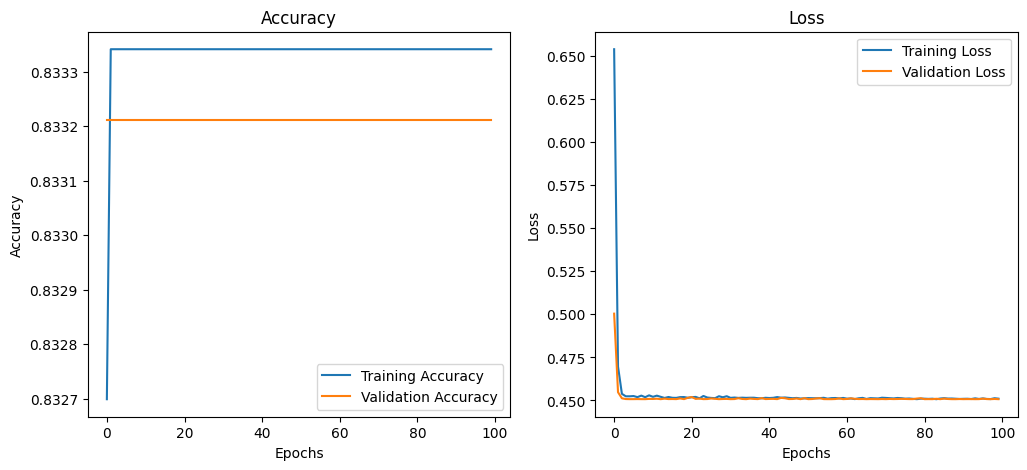

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Normalize the data
X_train = X_train / 255.0  # Scale pixel values to [0, 1]
X_test = X_test / 255.0

# Ensure input data shape is correct
if X_train.ndim == 3:  # Add channel dimension for grayscale images
    X_train = np.expand_dims(X_train, axis=-1)
if X_test.ndim == 3:
    X_test = np.expand_dims(X_test, axis=-1)

print("X_train shape:", X_train.shape)  # Expect (num_samples, 64, 64, 1)
print("X_test shape:", X_test.shape)    # Expect (num_samples, 64, 64, 1)

# Reapply one-hot encoding
num_classes = len(np.unique(np.argmax(y_train, axis=-1)))  # Dynamically determine the number of classes
y_train = to_categorical(np.argmax(y_train, axis=-1), num_classes=num_classes)
y_test = to_categorical(np.argmax(y_test, axis=-1), num_classes=num_classes)

print("y_train shape:", y_train.shape)  # Expect (num_samples, num_classes)
print("y_test shape:", y_test.shape)

# Enhanced Data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.2
)
datagen.fit(X_train)

# Define a regularized and simplified model
model = Sequential([
    Input(shape=(64, 64, 1)),
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),  # Increased dropout

    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),  # Increased dropout

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),  # Strong dropout
    Dense(num_classes, activation='softmax')  # Output layer
])

# Compile the model with a smaller learning rate
model.compile(
    optimizer=Adam(learning_rate=5e-4),  # Start with a slightly reduced learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Learning Rate Scheduler for warmup
def warmup(epoch):
    if epoch < 5:
        return 5e-5  # Start small during initial epochs
    return 5e-4  # Default learning rate after warmup

lr_scheduler = LearningRateScheduler(warmup)

# Callbacks
model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reduce learning rate by half when performance plateaus
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# Train the model without EarlyStopping
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=100,  # Ensure full training for 100 epochs
    validation_data=(X_test, y_test),
    callbacks=[model_checkpoint, reduce_lr, lr_scheduler]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy:.2f}, Test loss: {test_loss:.2f}")

# Plot learning curves
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
